In [19]:
from keras.datasets.mnist import load_data 
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from matplotlib.pyplot import *
from numpy import *
from numpy.random import normal, randint

# GAN Network

## Defining GAN

In [20]:
def discriminator():
    model = Sequential()
    model.add(Dense(784,input_dim=784))

    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.1))
    model.add(Dense(400))

    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.1))
    model.add(Dense(200))

    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.1))
    model.add(Dense(100))

    model.add(LeakyReLU(0.1))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0002, beta_1=0.4))

    return model

In [21]:
def generator():
    model = Sequential()
    model.add(Dense(100,input_dim=100))

    model.add(LeakyReLU(0.1))
    model.add(Dense(200))

    model.add(LeakyReLU(0.1))
    model.add(Dense(400))

    model.add(LeakyReLU(0.1))
    model.add(Dense(784, activation="tanh"))
    model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0002, beta_1=0.4))

    return model

## Preprocessing

In [22]:
batch_size = 128
epochs = 100

(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train/255
x_train = x_train.reshape(60000, 784)

gen = generator()
disc = discriminator()

disc.trainable = False

input = Input(shape=(100,))
output = disc(gen(input))
model = Model(inputs=input, outputs=output)

model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0002, beta_1=0.4))

## Training GAN

In [23]:
for i in range(epochs):
    for j in range(batch_size):        
        x = x_train[randint(0,60000, size=batch_size)]
        y = gen.predict(normal(0,1, (batch_size, 100)))

        x = concatenate((x, y))
        y = zeros(batch_size * 2)
        y[:batch_size] = 1

        disc.trainable=True
        disc.train_on_batch(x, y)
        disc.trainable=False

        x = normal(0,1, (batch_size, 100))
        y = ones(batch_size)
        model.train_on_batch(x, y)

    print("Epoch",i+1,"/",epochs)

Epoch 1 / 100
Epoch 2 / 100
Epoch 3 / 100
Epoch 4 / 100
Epoch 5 / 100
Epoch 6 / 100
Epoch 7 / 100
Epoch 8 / 100
Epoch 9 / 100
Epoch 10 / 100
Epoch 11 / 100
Epoch 12 / 100
Epoch 13 / 100
Epoch 14 / 100
Epoch 15 / 100
Epoch 16 / 100
Epoch 17 / 100
Epoch 18 / 100
Epoch 19 / 100
Epoch 20 / 100
Epoch 21 / 100
Epoch 22 / 100
Epoch 23 / 100
Epoch 24 / 100
Epoch 25 / 100
Epoch 26 / 100
Epoch 27 / 100
Epoch 28 / 100
Epoch 29 / 100
Epoch 30 / 100
Epoch 31 / 100
Epoch 32 / 100
Epoch 33 / 100
Epoch 34 / 100
Epoch 35 / 100
Epoch 36 / 100
Epoch 37 / 100
Epoch 38 / 100
Epoch 39 / 100
Epoch 40 / 100
Epoch 41 / 100
Epoch 42 / 100
Epoch 43 / 100
Epoch 44 / 100
Epoch 45 / 100
Epoch 46 / 100
Epoch 47 / 100
Epoch 48 / 100
Epoch 49 / 100
Epoch 50 / 100
Epoch 51 / 100
Epoch 52 / 100
Epoch 53 / 100
Epoch 54 / 100
Epoch 55 / 100
Epoch 56 / 100
Epoch 57 / 100
Epoch 58 / 100
Epoch 59 / 100
Epoch 60 / 100
Epoch 61 / 100
Epoch 62 / 100
Epoch 63 / 100
Epoch 64 / 100
Epoch 65 / 100
Epoch 66 / 100
Epoch 67 / 100
Epoc

# Digit Classifier

In [24]:
def digit_classifier():
  model = Sequential()
  model.add(Dense(784,input_dim=784))

  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.1))
  model.add(Dense(400))

  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.1))
  model.add(Dense(200))

  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.1))
  model.add(Dense(100))

  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.1))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [25]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

classifier = digit_classifier()
classifier.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split = 0.1)

Epoch 1/100
422/422 [==============================] - 9s 22ms/step - loss: 1.3124 - accuracy: 0.6184 - val_loss: 0.4514 - val_accuracy: 0.8902
Epoch 2/100
422/422 [==============================] - 9s 21ms/step - loss: 0.5261 - accuracy: 0.8456 - val_loss: 0.2885 - val_accuracy: 0.9195
Epoch 3/100
422/422 [==============================] - 9s 22ms/step - loss: 0.4053 - accuracy: 0.8813 - val_loss: 0.2407 - val_accuracy: 0.9303
Epoch 4/100
422/422 [==============================] - 9s 22ms/step - loss: 0.3465 - accuracy: 0.8984 - val_loss: 0.2121 - val_accuracy: 0.9358
Epoch 5/100
422/422 [==============================] - 9s 21ms/step - loss: 0.3077 - accuracy: 0.9090 - val_loss: 0.1927 - val_accuracy: 0.9425
Epoch 6/100
422/422 [==============================] - 9s 22ms/step - loss: 0.2823 - accuracy: 0.9176 - val_loss: 0.1735 - val_accuracy: 0.9497
Epoch 7/100
422/422 [==============================] - 9s 22ms/step - loss: 0.2605 - accuracy: 0.9226 - val_loss: 0.1603 - val_accuracy:

# Capcha Generator

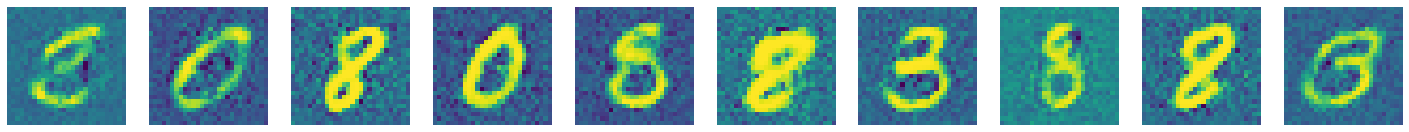

In [26]:
# Rerun to regenerate captcha
images = gen.predict(normal(0, 1, size=(10, 100)))
predictions = classifier.predict(images)
labels = ""
for prediction in predictions:
  max_index = 0
  for j in range(len(prediction)-1):
    if prediction[max_index] < prediction[j+1]:
      max_index = j+1
  labels += str(max_index)

images = images.reshape(10,28,28)
figure(figsize=(25,25))
ans=[]
for i in range(10):
    subplot(1,10, i+1)
    axis("off")
    imshow(images[i])
savefig("capcha.png")

In [29]:
# User input of Captcha
value = "5080883883"  # Look at the captcha and enter digits without spaces here
if labels == value:
  print("Success")
else:
  print("Fail! Correct = ",labels, ", Input = ",value)

Success
